<a href="https://colab.research.google.com/github/trDalmi/Data-Science-Portfolio/blob/main/Rainfall_Prediction_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rainfall in Australia

Implementation of Logistic Regression with Python and Scikit-Learn to build a classifier to predict whether or not it will rain tommorow in Australia. Training a binary classification model using Logistic Regresssion.

## Table of Contents:
The table of contents for this project is as follow:-

1. The Problem Statement
2. Import Libraries
3. Import Dataset
4. Exploratory Data Analysis
*   4.1 View dimensions of dataset
*   4.2 Preview the dataset
*   4.3 View column names
*   4.4 Drop variables
*   4.5 View summary of dataset
*   4.6 View statistical properties of datset

5. Univariate Anaysis.
*   5.1 Explore RainTommorow target variable.
*   5.2 Finding of Univariate Analysis.
6. Bivariate Analysis
*   6.1 Types of varibles
*   6.2 Explore Categorical variables
*   6.3 Summary of Categorical variables.
*   6.4 Explore problems within categorical varibales.
*   6.5 Explore numerical variables.
*   6.6 Summary of numerical variables.
*   6.7 Exolore problems within numerical variables.
7. Multivariate Analysis.
*   7.1 Heat Map
*   7.2 Pair Plot.
8. Declare feature vector and target variable
9. Split data into trainig and test set.
10. Feature Engineering
*   10.1 Engineering missing values in numerical variables.
*   10.2 Engineering missing values in categorical variables.
*   10.3 Engineering outliers in numerical variables.
*   10.4 Encode categorical variables.
11. Feature Scaling
12. Model training
13. Predict results
14. Check accuracy score
*   14.1 Compare train-set and test-set accuracy.
*   14.2 Check for overfitting and underfitting
*   14.3 Compare model accuracy with null accuracy.
15. Confusion Matrix
16. Classification metrices.
*   16.1 Classification report
*   16.2 Classification accuracy.
*   16.3 Classification error.
*   16.4 Precision
*   16.5 Recall
*   16.6 True Positive Rate
*   16.7 False Positive Rate
*   16.8 Specificity
*   16.9 f1-score
*   16.10 Support
17. Adjust the threshold level.
18. ROC-AUC
19. Recursive Feature Elimination with cross(RFECV)
20. k-Fold Cross-Validation
21. Hyperparameter Optimization using GridSearch CV
22. Result and Conclusion
23. References.


















## 1. The Problem Statement

In this project, we will try to answer the question that whether or not it will rain tommorow in Australia.
We will implement Logistic Regression with Python and Scikit-Learn

To answer the question, we build a classifier to predict whether or not it will rain tomorrow in Australia. We train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.
## 2. Import Librabies
The first step in building the model is to import the necessary libraries.

In [1]:
import numpy as np # LINEAR ALGEBRA
import pandas as pd # DATA PROCESSING, CSV FILE I/O

# importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Import Dataset
The next step is to import the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "/content/drive/MyDrive/Datasets/weatherAUS.csv"
df = pd.read_csv(file_path)

## 4. Exploratory data analysis
*   We have imported the data.
*   Now, it time to explore the data to gain insights about it.

### View Dimesions of dataset



In [4]:
df.shape

(142193, 24)

We can see that the data contains 142193 instances and 24 variables in the dataset.
### Preview the dataset.

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### View Column names

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

This dataset contains detailed meteorological information recorded in Albury, Australia, for a specific period. It includes 24 attributes for each day, capturing various aspects of weather. These attributes include:


*   DATE : The date of the weather observation.
*   Location: The location where the observation was made.
*   MinTemp: Minimum temperature of the day (in degree Celsius)
*   MaxTemp: Maximum temperature of the day (in degree Celsius)
*   Rainfall: Total rain recorded for the day in mm.
*   Evapration: Total evaporation recorded for the day in mm.
*   Sunshine: Total hours of sunshine recorded for the day.
*   WindGustDir: The direction of the strongest wind gust during the day.
*   WindGustSpeed: The speed of the strongest wind gust during the day.
*   WindDir9am: The wind direction at 9am.
*   WindDir3pm: The wind direction at 3pm.
*   WindSpeed9am: The wind speed at 9am (in kilometers per hours).
*   WindSpeed3pm: The wind speed at 3pm (in kilometers per hours).
*   Humidity9am: The humidity level at 9am (percentage)
*   Humidity3pm: The humidity level at 3pm (percentage)
*   Cloud9am: The cloud cover at 9am (measured in oktas).
*   Cloud3pm: The cloud cover at 3pm (measured in oktas).
*   Temp9am: The temperature at 9am (in degree Celsius).
*   Temp3pm: The temperature at 3pm (in degree Celsius).
*   RainToday: Indicator of whether it rainged today (YES or NO).
*   RISK_MM: The amount of rain(in millimeters) recorded for the next day.
*   RainTomorrow: Indicator of whether it rained the next day (Yes or NO).'

This dataset provides comprehensive insights into daily weather patterns and variations, aiding in climate analysis and prediction.





In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### Comment:
*   We can see that the dataset contains mixture of categorical and numerical values.
*   Categorical variables have data type **Object**.
*   Numerical variables have data type **Float64**.
*   Also, there are some missing values in the dataset as all the  attributes does not have the same count of values.

Counting the null values for each attributes:



In [8]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


look at null values. (as we can see the dataframe has a lot of null values)

### View Statistical Properties of dataset.

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


#### Important points to note:
*   The above commad df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.
*   If we want to view the statistical properties of character variables, we should run the following command-
    df.describe(include = ['object'])
*   If we want to view the statistical properties of all the variables, we should run the following command-
    df.describe(include = "all")


In [10]:
df.describe(include = "all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2013-03-07,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


# 5. Univariate Analysis
#### Explore **RainTomorrow** target variable
Check for missing values

In [11]:
df['RainTomorrow'].isnull().sum()

0

We can see that there are no missing values in the RainTomorrow target variable.
#### View the number of unique values.

In [12]:
df['RainTomorrow'].nunique()

2

#### View the unique values.

In [13]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

We can see that the number of unique values in RainTommorow varibale is 2. And they are YES and NO.
#### View the frequency distribution of values.

In [14]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


#### View percentage of frequency distribution of values.

In [15]:
df['RainTomorrow'].value_counts()/len(df)

,count
RainTomorrow,
No,0.775819
Yes,0.224181


#### Comment
*  We can see that out of the total number of RainTomorrow vlaues, NO appears 77.58% times and YES appears 22.42% times.

?? Can we say that the data is unbalanced and will make biased predictions.

<ipython-input-16-b4872c9bddfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['RainTomorrow'],palette = "Set1")


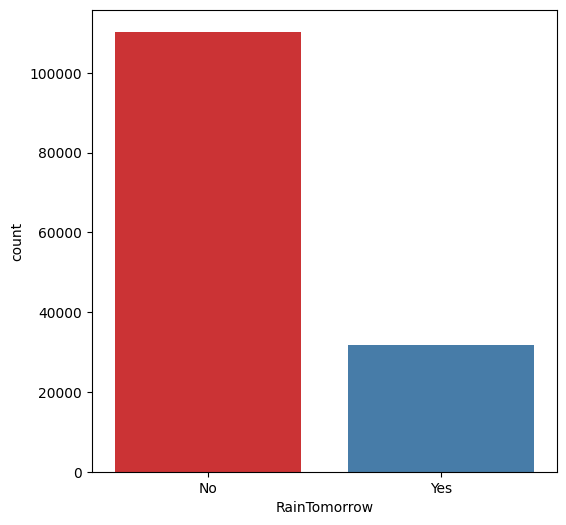

In [16]:
plt.figure(figsize = (6,6))
sns.countplot(x = df['RainTomorrow'],palette = "Set1")
plt.show()

#### Interpretation
*  The above univariate plot confirms our findings that-
  *  The NO variable have 110316 entries, and
  * The Yes variable have 31877 entries.

Henceforth we can say that the the data is unbalanced.

### Findings of Univariate Analysis:
*  The number of unique values in RainTomorrow variable is 2.

*  The two unique values are No and Yes.

*  Out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times.

*  The univariate plot confirms our findings that –

   * The No variable have 110316 entries, and

  * The Yes variable have 31877 entries.

# 6. Bivariate Analysis

### Types of Varibales

In this section, We will segregate the dataset into categorical and numerical variables. There are a micture of categorical and numerical varibales in the dataset. Categorical varibale have data type object. Numerical varibales have data type float64.

First of all, I will find the cateforical varibales.



#### Explore Catergorical Variables

In [46]:
categorical = [var for var in df.columns if df[var].dtype == 'object']
print('There are {} categorical variables\n'.format(len(catergorical)))
print('The categorical variables are :\n\n', catergorical)

There are 7 categorical variables

The categorical variables are :

 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [40]:
# View the categorical varibales
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


#### Summary of categorical varibales
*  There is a date varibale. It is denoted by Date column.
*  There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, and RainTomorrow.
*  There are two binary categorical varibales - RainToday and RainTomorrow.
*  RainTomorrow is the target variable.

#### Explore the problems within categorical variables
First, I will explore the categorical variables.
#### Missing values in categorical variables

In [42]:
# Check the missing values in categorical variables
df[categorical].isnull().sum()

,0
Date,0
Location,0
WindGustDir,9330
WindDir9am,10013
WindDir3pm,3778
RainToday,1406
RainTomorrow,0


In [43]:
# Print categorical variables containing missing values
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


We can see that there are only 4 categorical varibales in dataset which contains missing values. These are WindGustDir, WindDir9am, WindDir3pm, and RainToday.

#### Frequency count of categorical variables.
Now, lets check the frequenct counts of categorical varibales.

In [47]:
for var in categorical:
  print(df[var].value_counts())

Date
2013-03-07    49
2013-03-06    49
2013-04-14    49
2013-04-03    49
2013-04-21    49
              ..
2007-11-07     1
2007-11-08     1
2007-11-09     1
2007-11-10     1
2007-11-11     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith  

In [50]:
# view frequency distribution of categorical variables
for var in categorical:
  print(df[var].value_counts()/(len(df)))

Date
2013-03-07    0.000345
2013-03-06    0.000345
2013-04-14    0.000345
2013-04-03    0.000345
2013-04-21    0.000345
                ...   
2007-11-07    0.000007
2007-11-08    0.000007
2007-11-09    0.000007
2007-11-10    0.000007
2007-11-11    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Ballarat            0.021295
Launceston          0.021295
Albany              0.021211
Albury              0.021175
MelbourneAirport    0.021161
PerthAirport        0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.02

#### Number of labels: cardinality
The number of labels within a categorical varibales is known as cardinality. A high number of labels within a varbale is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. SO, lets check for high cardinality.

In [54]:
# Check for cardinality in categorical variables
for var in categorical:
  print(var, 'contains', df[var].nunique(), 'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 16 labels
WindDir9am contains 16 labels
WindDir3pm contains 16 labels
RainToday contains 2 labels
RainTomorrow contains 2 labels


We can see that there is a **Date** variable which needs to be preprocesses. I will do preprocessing in the following section. Here rather than consider the date as for date we will generalise it a months or week more minised lens.


All the other variables contain relatively smaller number of variables.

## Feature Engineering of Date variable

In [57]:
df['Date'].dtype

dtype('O')